## Objetos.

### Un objeto es una colección de datos (variables) y métodos (funciones) que actúan sobre esos datos.

### La clase es donde tú defines un molde de lo que quieras programar y un objeto es cuando ya le das datos al objeto. 
### La clase sería una especie de molde y los objetos serían galletas.

In [ ]:
class galleta:
    sabor = "chocolate"
    
    def print_sabor(self):
        print(self.sabor)

In [ ]:
galleta1 = galleta()
galleta1.sabor
galleta1.print_sabor()

In [ ]:
class galleta:
    #Método constructor
    def __init__(self, sabor, tamanio):
        #Atributos del objeto
        self.sabor = sabor
        self.tamanio = tamanio

In [ ]:
g1 = galleta(sabor = "chocolate", tamanio = "grande")
g1.sabor
g1.tamanio

In [ ]:
class Persona:
    """
    Una clase que da el nombre y la edad de una persona.
    """
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

p1 = Persona("Daniel", 23)
p2 = Persona("Carolina", 18)

In [ ]:
#Esto es para dar la información que proporciona la clase.
print(p1.__doc__)

# Ejemplo de Tiro Parabólico

a=99.8652810959962 
b=20.28238120617667 
c=-4.94686776669622


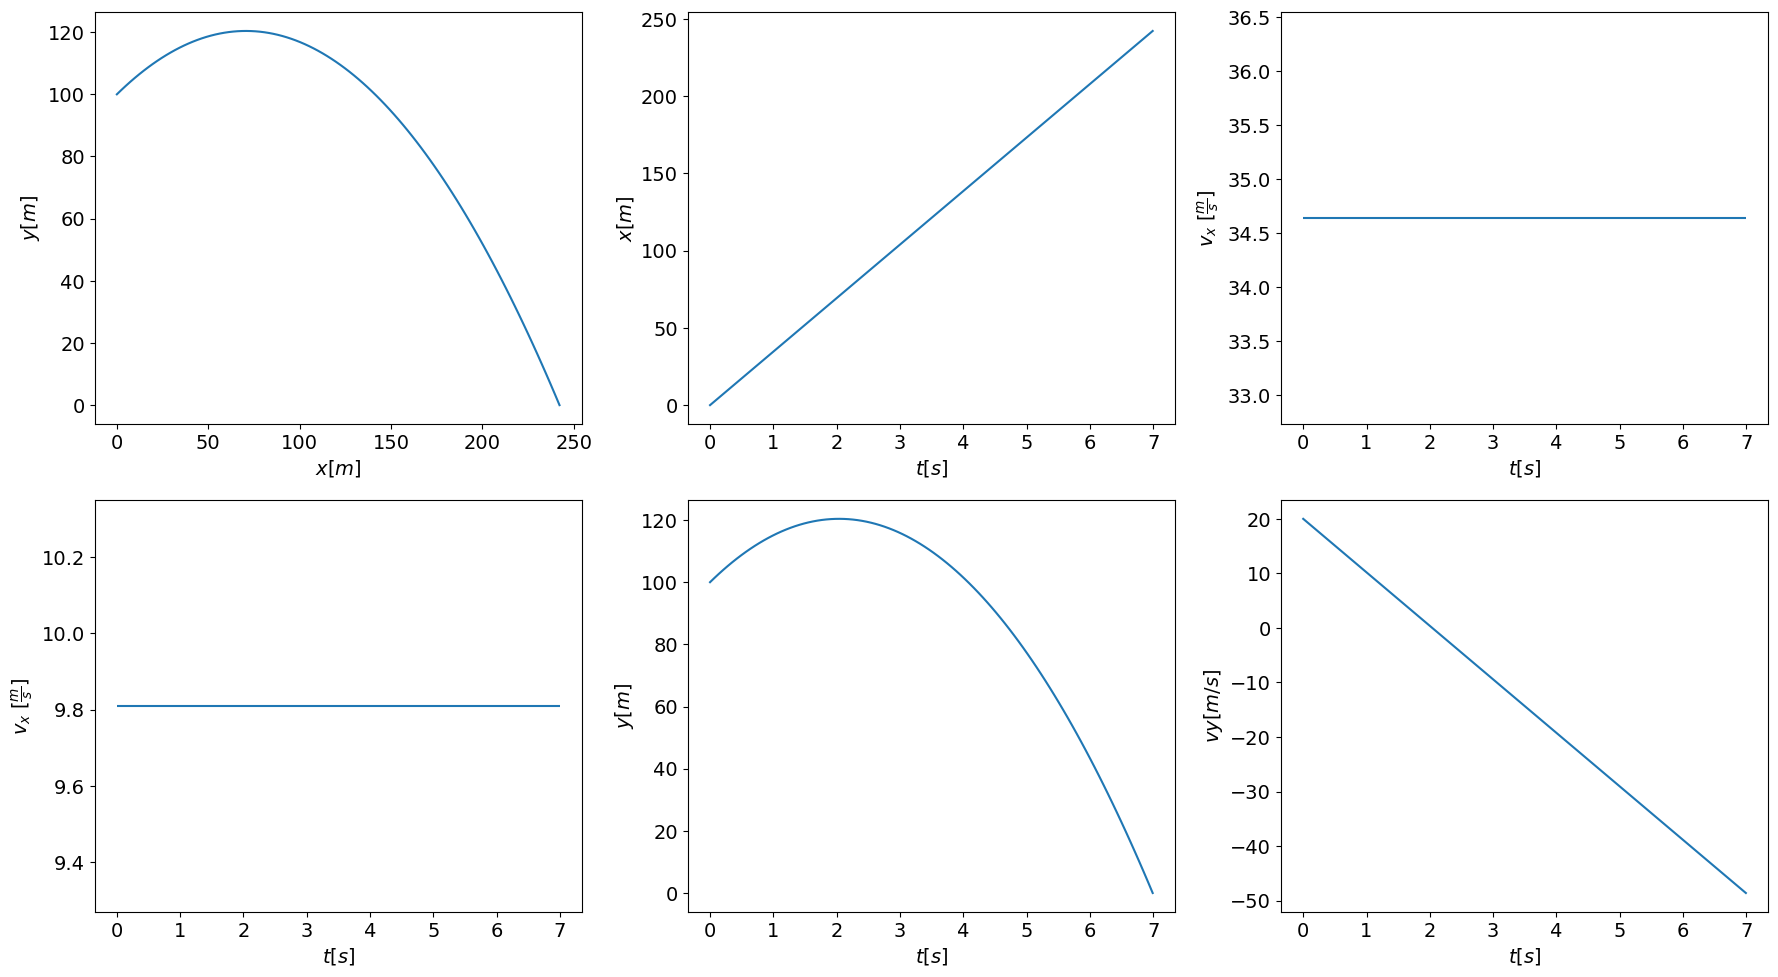

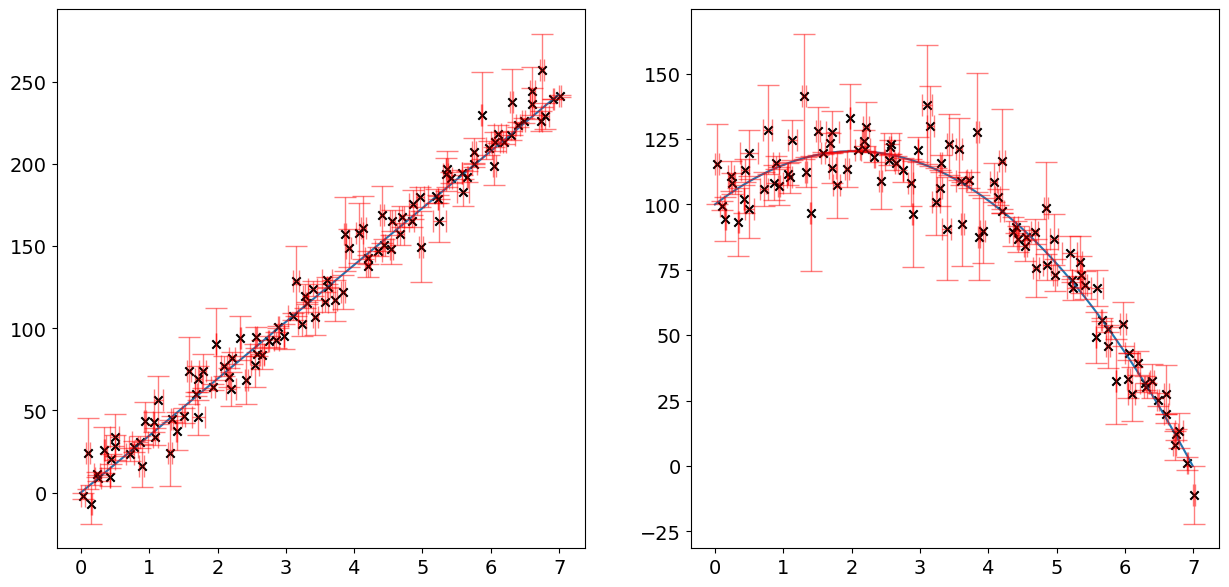

In [5]:
import numpy as np
from scipy.optimize import root_scalar, curve_fit
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":14})



class Particula():
    """
    Clase de una partícula que simula un tiro parabólico.
    """
    def __init__(self, v0, ang, h , g = 9.81):
        self.v0 = v0
        self.ang = ang
        self.h = h 
        self.g = g
        #self.v0x, self.v0y = vel_ini_comp()
        self.vel_ini_comp()
        
    def vel_ini_comp(self):
        self.v0x = self.v0*np.cos(np.deg2rad(self.ang))
        self.v0y = self.v0*np.sin(np.deg2rad(self.ang))
        #return v0x, v0y
    
    def pos_x(self, t):
        res = t * self.v0x
        return res

    def pos_y(self, t):
        res = -0.5 * self.g * t * t + t * self.v0y + self.h
        return res
    
    def vel_y(self, t):
        res = -self.g * t + self.v0y
        return res
    
    def vel_x(self):
        return self.v0x
    
    def make_sim(self):
        self.t_f = root_scalar(self.pos_y,
                               x0 = 10, 
                               fprime = self.vel_y, 
                               method = "Newton").root
        self.t_bins = np.linspace(0,self.t_f,100)
        x = self.pos_x(self.t_bins)
        y = self.pos_y(self.t_bins)
        vx = self.vel_x()
        vy = self.vel_y(self.t_bins)
        self.plot_results(x,y,vx,vy)
        x_real, err_x = self.real_x(x, 10)
        y_real, err_y = self.real_x(y, 10)
        t_real, err_t = self.real_t(0.05)
        
        fig, axes = plt.subplots(1,2, figsize =(15,7))
        self.plot_sim(axes[0], self.t_bins, t_real, err_t, x, x_real, err_x)
        self.plot_sim(axes[1], self.t_bins, t_real, err_t, y, y_real, err_y)
        
        res = self.fit_params(t_real, y_real)
        print(f"a={res[0]} \nb={res[1]} \nc={res[2]}")
        

    def plot_sim(self, ax, x_teo, x_sim, err_x, y_teo, y_sim, err_y):
        ax.plot(x_teo, y_teo)
        ax.scatter(x_sim, y_sim, marker="x", c="k")
        # Aplicar abs() a los errores en el eje x para asegurarse de que sean no negativos
        ax.errorbar(x_sim, y_sim, 
                    xerr=np.abs(err_x), 
                    yerr=np.abs(err_y), ecolor="red", 
                    fmt="x", color="black", 
                    capsize=8, elinewidth=1, 
                    alpha=0.5)

        
    def func1(self,x,a,b,c):
        y = a + b * x + c *x*x
        return y
        
    def fit_params(self, x_real, y_real):
        res = curve_fit(self.func1, xdata = x_real, ydata=y_real)[0]
        return res
    
    def real_x(self, x,scale):
        errores = np.random.normal(loc = 0, scale=scale, size=len(x))
        res = x + errores
        return res, errores
    
    def real_t(self, scale):
        errores = np.random.normal(loc = 0, scale=scale, size=len(self.t_bins))
        res = self.t_bins + errores
        return res, errores
            
            
    def plot_results(self,x,y,vx,vy):
        fig , axes = plt.subplots(2,3, figsize = (18, 10))
        
        axes[0][0].plot(x,y)
        axes[0][0].set_xlabel("$x[m]$")
        axes[0][0].set_ylabel("$y[m]$")
        axes[1][0].hlines(self.g, min(self.t_bins), max(self.t_bins))
        axes[1][0].set_xlabel("$t[s]$")
        axes[1][0].set_ylabel(r"$v_x$ [$\frac{m}{s}$]")
        axes[0][1].plot(self.t_bins, x)
        axes[0][1].set_xlabel("$t[s]$")
        axes[0][1].set_ylabel("$x[m]$")
        axes[1][1].plot(self.t_bins, y)
        axes[1][1].set_xlabel("$t[s]$")
        axes[1][1].set_ylabel("$y [m]$")
        axes[1][2].plot(self.t_bins, vy)
        axes[1][2].set_xlabel("$t[s]$")
        axes[1][2].set_ylabel("$vy [m/s]$")
        axes[0][2].hlines(vx, min(self.t_bins), max(self.t_bins))
        axes[0][2].set_xlabel("$t[s]$")
        axes[0][2].set_ylabel(r"$v_x$ [$\frac{m}{s}$]")        
        
        fig.tight_layout()


    def cond_ini(self):
        print(f"La velocidad inicial es {self.v0}")
        print(f"El ángulo inicial es {self.ang}")
        print(f"La altura es {self.h}")
        print(f"La aceleración de la gravedad es {self.g}")
        print(f"La velocidad inicial en x es {self.v0x}")
        print(f"La velocidad inicial en y es {self.v0y}")



p1 = Particula(v0 = 40, ang = 30, h = 100 )
p1.make_sim()

# Ejemplo de Conservación de la energía

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Oscilador armónico 
class oscilador():
    """
    Clase que genera un movimiento oscilatorio 
    """
    
    #Se definen los principales atributos del oscilador
    def __init__(self, xm , omega , phi): 
        #Amplitud:
        self.xm = xm
        #Frecuencia:
        self.omega = omega
        #Fase:
        self.phi = phi
    
    #Se define la función de la posición
    def posicion(self, t):
        pos = self.xm*np.cos(self.omega*t + self.phi)
        return pos
    
    #Se define la energia cinética
    #Para ello se derivó la función de posición
    def energia_cinetica(self, t):
        vx = -self.xm*self.omega*np.sin(self.omega*t + self.phi)
        #Aquí fue en donde hice la masa igual a 1
        cinetica = (0.5)*vx**2
        return cinetica
    
    #Se define la energia potencial
    #Se hizo el factor k = 1
    def energia_potencial(self, pos):
        pot = (0.5)*(pos)**2
        return pot
    
    #Se define la energía mecánica
    def energia_mecanica(self, cinetica, potencial):
        mecanica = cinetica + potencial
        return mecanica
    
    #Se grafica la posición
    def grafica_posicion(self, pos):
        fig = plt.subplots( figsize = (18, 5))
        plt.plot(t, pos, color = "Orange",
                label = f"$\omega$ = {self.omega}")
        plt.title("Posición",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.xlabel("$t \ [s]$",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.ylabel("$x(t) \ [m]$",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.grid()
        plt.legend()
    
    #Se grafican las energías
    def graficas_energias(self, cinetica, potencial, mecanica):
        
        fig = plt.subplots(1,3, figsize = (18, 5))
        plt.subplot(1, 3, 1)
        plt.plot(t, cinetica, color = "Blue",
                 label = f"$\omega$ = {self.omega}")
        plt.title("Energía Cinética",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.xlabel("$t \ [s]$",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.ylabel("$KE \ [Joules]$",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.grid()
        plt.legend()
        
        plt.subplot(1, 3, 2) 
        plt.plot(t,potencial, color = "Red", 
                 label = f"$\omega$ = {self.omega}")
        plt.title("Energía Potencial",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})        
        plt.xlabel("$x \ [m]$",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.ylabel("$PE \ [Joules]$",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.grid()
        plt.legend()

        plt.subplot(1, 3, 3) 
        plt.plot(t, mecanica, color = "Green",
                label = f"$\omega$ = {self.omega}")
        plt.title("Energía Mecánica",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.xlabel("$t \ [s]$", fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.ylabel("$EM \ [Joules]$", fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
        plt.grid()
        plt.legend()

#En esta función se hace lo de calcular 3 diferentes frecuencias
def frecuencias(t, frecuencias, xm, phi):
    plt.figure(figsize=[18,6])
    for omega in frecuencias:
        p = oscilador(xm, omega, phi)
        y = p.posicion(t)
        plt.plot(t, y, label = f"$\omega$ = {omega}")
    plt.title("Oscilador armónico, distintas frecuencias",fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
    plt.xlabel("$t \ [s]$", fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
    plt.ylabel("$x(t)\ [m]$", fontdict={'fontname': "Comic Sans MS", "fontsize": 15})
    plt.grid()
    plt.legend()
    plt.show()       
            

#Este es un parámetro de tiempo
def tiempo(t0, tf, bins):
    t = np.linspace(t0, tf , bins)
    return t

In [ ]:
t = tiempo(t0=0, tf=5, bins=1000)

#Se define nuestro objeto
p1 = oscilador(xm=3, omega=1, phi=0)

#función posición
pos = p1.posicion(t)
#Energía cinética
cinetica = p1.energia_cinetica(t)
#Energía potencial
potencial = p1.energia_potencial(pos)
#Energía mecánica
mecanica = p1.energia_mecanica(cinetica, potencial)

#Cabe recalcar que solo se están haciendo las gráficas de la energía de un objeto
p1.graficas_energias(cinetica, potencial, mecanica)
#Gráfica de la posición de nuestro objeto
p1.grafica_posicion(pos)
#Estas son las gráficas de distintos objetos con distintas frecuencias
frecuencias(t,[1,2,3], xm=2, phi=0)